Analytics

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


In [34]:
url = "https://contortion-6c4d5-default-rtdb.firebaseio.com/rotationAnalytics.json"

In [35]:
try:
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    
    if isinstance(data, list):
        df = pd.DataFrame(data)
    elif isinstance(data, dict):
        df = pd.DataFrame.from_dict(data, orient='index')
    else:
        print("Unexpected data format:", type(data))
        df = None
        
    if df is not None:
        print(df.head())

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")


                                     date    level  rotations causeOfDeath  \
-OA3pIzMHP4imoA4W3Fw  2024-10-25 10:59:23  Level_1          3          NaN   
-OA3pNFunVRtpVLURqGM  2024-10-25 10:59:41  Level_1          3          NaN   
-OA3pP8pc73NwQaZdd3M  2024-10-25 10:59:49  Level_2          3          NaN   
-OA3pSCNPIBoWoA1EwNC  2024-10-25 11:00:01  Level_3          1          NaN   
-OA3pSKpZ1_Xn3C8wN2t  2024-10-25 11:00:02  Level_3          0          NaN   

                     levelStatus  
-OA3pIzMHP4imoA4W3Fw         NaN  
-OA3pNFunVRtpVLURqGM         NaN  
-OA3pP8pc73NwQaZdd3M         NaN  
-OA3pSCNPIBoWoA1EwNC         NaN  
-OA3pSKpZ1_Xn3C8wN2t         NaN  


In [36]:
df = df[~df['level'].str.contains('Tutorial', case=False, na=False)]
print(df.head())

                                     date    level  rotations causeOfDeath  \
-OA3pIzMHP4imoA4W3Fw  2024-10-25 10:59:23  Level_1          3          NaN   
-OA3pNFunVRtpVLURqGM  2024-10-25 10:59:41  Level_1          3          NaN   
-OA3pP8pc73NwQaZdd3M  2024-10-25 10:59:49  Level_2          3          NaN   
-OA3pSCNPIBoWoA1EwNC  2024-10-25 11:00:01  Level_3          1          NaN   
-OA3pSKpZ1_Xn3C8wN2t  2024-10-25 11:00:02  Level_3          0          NaN   

                     levelStatus  
-OA3pIzMHP4imoA4W3Fw         NaN  
-OA3pNFunVRtpVLURqGM         NaN  
-OA3pP8pc73NwQaZdd3M         NaN  
-OA3pSCNPIBoWoA1EwNC         NaN  
-OA3pSKpZ1_Xn3C8wN2t         NaN  


In [37]:
average_rotations_per_level = df.groupby('level')['rotations'].mean()
print(average_rotations_per_level)

level
Level_1    2.301288
Level_2    2.238267
Level_3    2.128485
Level_4    3.520202
Level_5    3.432540
Level_6    3.517572
Level_7    2.558824
Name: rotations, dtype: float64


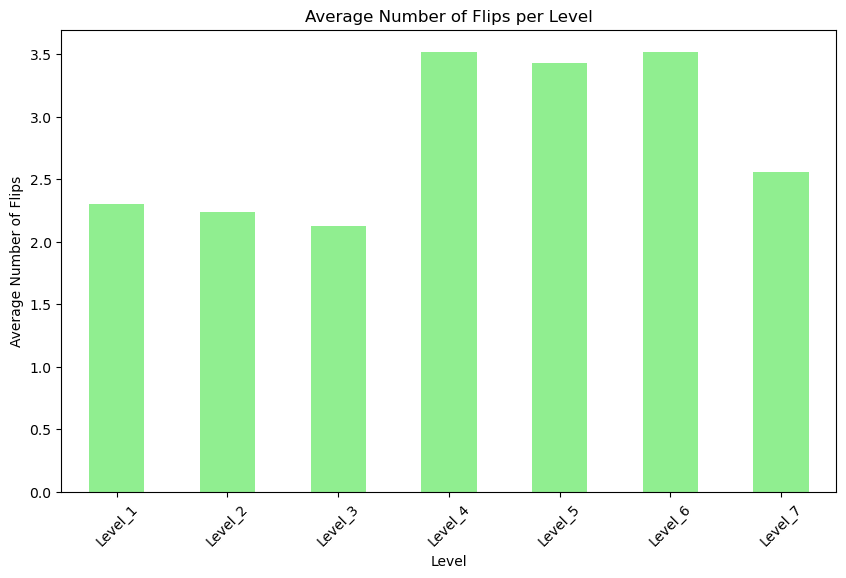

In [38]:

plt.figure(figsize=(10, 6))
average_rotations_per_level.plot(kind='bar', color='lightgreen')
plt.title('Average Number of Flips per Level')
plt.xlabel('Level')
plt.ylabel('Average Number of Flips')
plt.xticks(rotation=45)
plt.show()


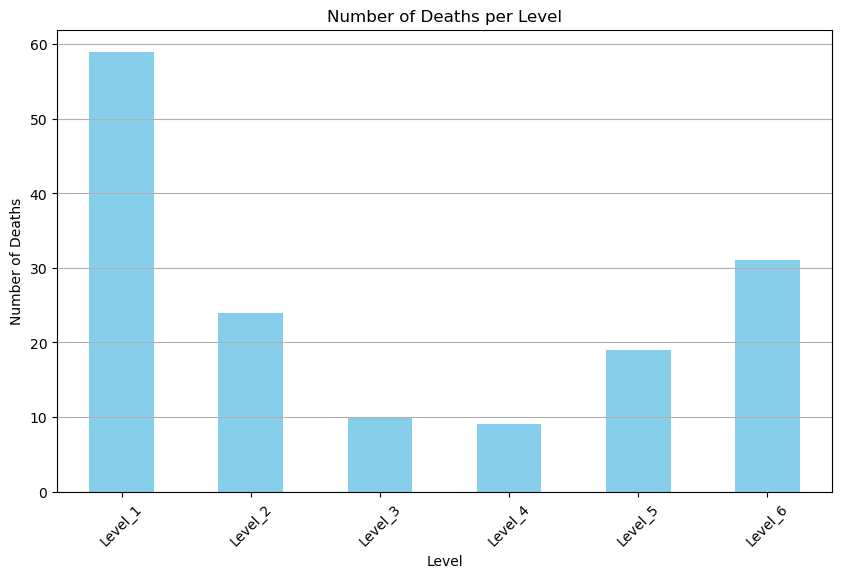

In [43]:
df['causeOfDeath'] = df['causeOfDeath'].replace('Unknown', 'Level Cleared')
death_data = df.dropna(subset=['causeOfDeath'])

df_deaths = death_data[death_data['causeOfDeath'] != 'Level Cleared']

deaths_per_level = df_deaths.groupby('level').size()

plt.figure(figsize=(10, 6))
deaths_per_level.plot(kind='bar', color='skyblue')
plt.title('Number of Deaths per Level')
plt.xlabel('Level')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


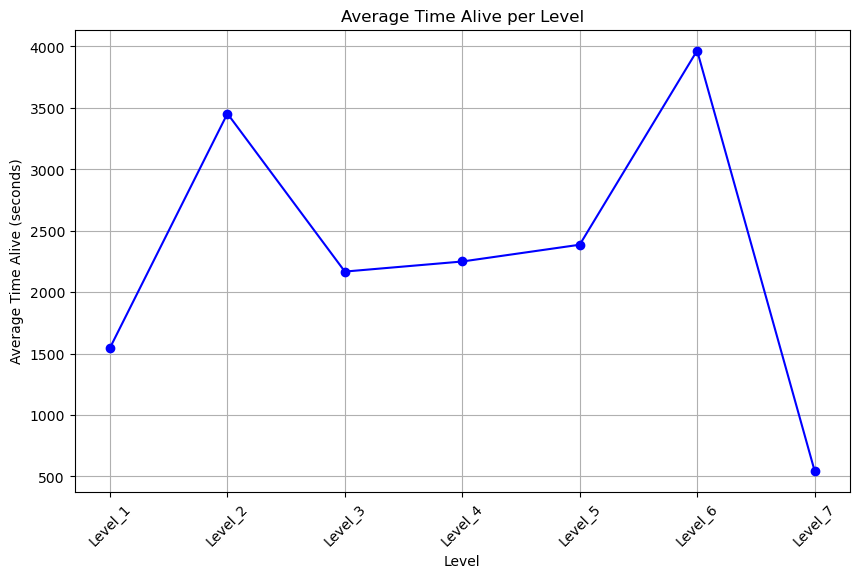

In [19]:
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by=['level', 'date'])

df['time_alive'] = df.groupby('level')['date'].diff().dt.total_seconds()

df = df.dropna(subset=['time_alive'])

average_time_alive_per_level = df.groupby('level')['time_alive'].mean()

plt.figure(figsize=(10, 6))
average_time_alive_per_level.plot(kind='line', marker='o', color='blue')
plt.title('Average Time Alive per Level')
plt.xlabel('Level')
plt.ylabel('Average Time Alive (seconds)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


               Deaths  Percentage
causeOfDeath                     
Spikes             76        39.6
Crusher            69        35.9
Level Cleared      47        24.5


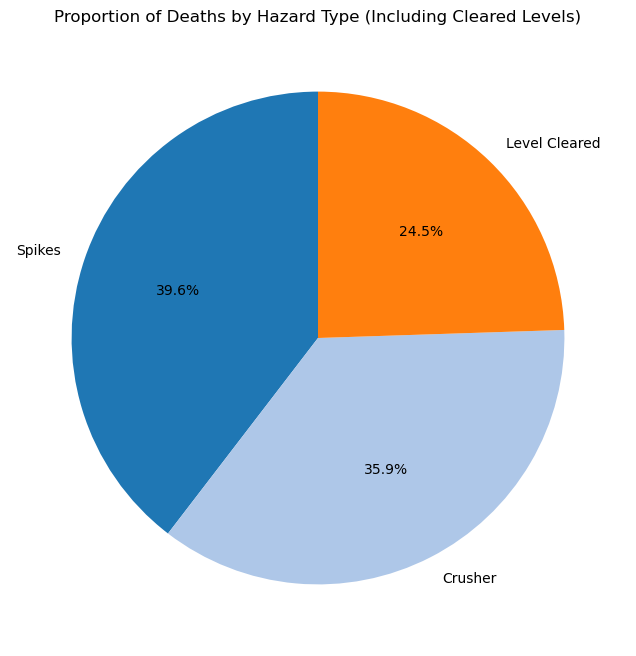

In [31]:
# df = df.dropna(subset=['causeOfDeath'])

df['causeOfDeath'] = df['causeOfDeath'].replace('Unknown', 'Level Cleared')

cause_counts = df['causeOfDeath'].value_counts()

cause_percentage = (cause_counts / cause_counts.sum()) * 100

death_summary = pd.DataFrame({
    'Deaths': cause_counts,
    'Percentage': cause_percentage.round(1)
})

# Display the table
print(death_summary)

# Plot the pie chart
plt.figure(figsize=(8, 8))
cause_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Cause of Death')
plt.ylabel('') 
plt.show()
